# IMAGES PROCESSING

In [ ]:
# import os 

# dir_path = "DatasetsV6"
# name = os.listdir(dir_path)
# all_path = []

# for i in name :
#     new_path = "{}/{}".format(dir_path,i) 
#     all_path.append(new_path)

# all_path

['DatasetsV6/Ayam',
 'DatasetsV6/Bawang Merah',
 'DatasetsV6/Bawang Putih',
 'DatasetsV6/Kambing',
 'DatasetsV6/Lele',
 'DatasetsV6/Sapi',
 'DatasetsV6/Tahu',
 'DatasetsV6/Telur',
 'DatasetsV6/Tempe',
 'DatasetsV6/Udang']

In [ ]:
# from PIL import Image

# iter = 0
# for i in all_path:
#     extension = ".jpg" # set the file extension you want to search for her
#     iter2 = 284
#     # loop through all files in the directory
#     for filename in os.listdir(i):
#         if filename.endswith(extension):
#             image = Image.open("{}/{}".format(i,filename))
#             ubah = image.resize((244,244))
            
#             new_name = "NewData/{}/{}_{}.jpg".format(name[iter],name[iter],iter2)
#             ubah.save(new_name)
#             iter2 = iter2 + 1
            
#     iter = iter + 1

In [ ]:
# from PIL import Image
# import os

# dir_path = "DatasetsV6/Kambing"
# extension = ".jpg" # set the file extension you want to search for her
# iter2 = 263

# # loop through all files in the directory
# for filename in os.listdir(dir_path):
#     if filename.endswith(extension):
#         image = Image.open("{}/{}".format(dir_path,filename))
#         ubah = image.resize((244,244))
        
#         new_name = "DatasetsV6/new/Kambing_{}.jpg".format(iter2)
#         ubah.save(new_name)
#         iter2 = iter2 + 1

# TRANSFER LEARNING MODEL

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    # zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    channel_shift_range=10.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.,
    validation_split=0.2,
    )


In [8]:
Batch_size = 100

In [9]:
data_dir = "DatasetsV6"

train_ds = datagen.flow_from_directory(
	data_dir,
	class_mode='categorical',
  	batch_size=Batch_size,
    subset = 'training',
    shuffle=True,
)

val_ds = validation_datagen.flow_from_directory(
	data_dir,
	class_mode='categorical',
  	batch_size=Batch_size,
    subset = 'validation',
    shuffle=True,
)

Found 2400 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


d:\Anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\Anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


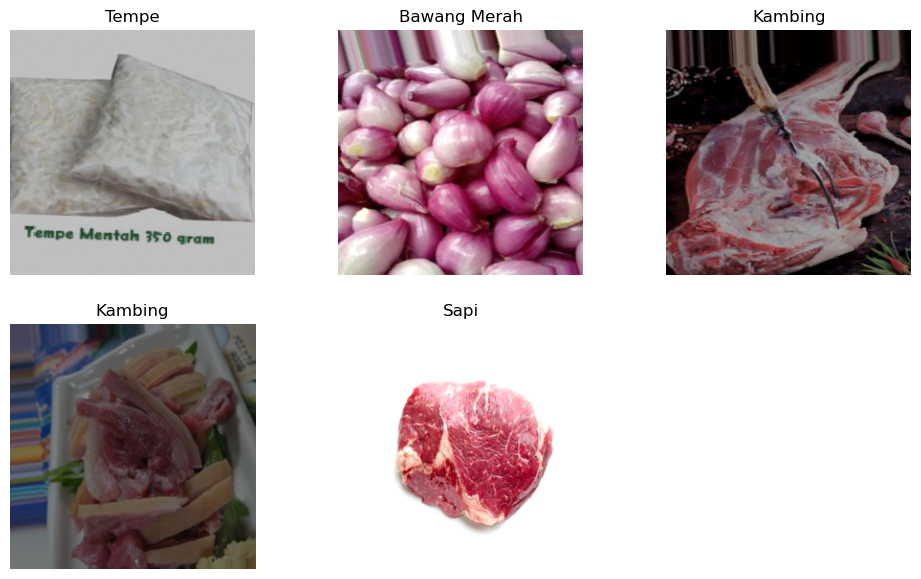

In [10]:
plt.figure(figsize=(12, 7))

class_names = list(train_ds.class_indices)
x,y = train_ds.next()

for i in range (5) :
    gambar = x[i,:,:,:]
    label = np.where(y[i,:] == 1)[0][0]
    plt.subplot(2, 3, i + 1)
    plt.imshow(gambar)
    plt.title(class_names[label])
    plt.axis("off")

In [11]:
print(x.shape)

(100, 256, 256, 3)


In [12]:
IMG_SHAPE = (256,256, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [13]:
base_model.trainable = False

In [14]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation="softmax")
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
history = model.fit(
        train_ds,
        steps_per_epoch=2400 // Batch_size,
        epochs=50,
        validation_data=val_ds,
        validation_steps=600 // Batch_size)

Epoch 1/50
24/24 [==============================] - 143s 6s/step - loss: 2.1533 - accuracy: 0.2271 - val_loss: 1.9225 - val_accuracy: 0.3467
Epoch 2/50
24/24 [==============================] - 109s 5s/step - loss: 1.8198 - accuracy: 0.3762 - val_loss: 1.6573 - val_accuracy: 0.4850
Epoch 3/50
24/24 [==============================] - 114s 5s/step - loss: 1.5742 - accuracy: 0.5017 - val_loss: 1.4385 - val_accuracy: 0.5700
Epoch 4/50
24/24 [==============================] - 105s 4s/step - loss: 1.3507 - accuracy: 0.6158 - val_loss: 1.2549 - val_accuracy: 0.6467
Epoch 5/50
24/24 [==============================] - 101s 4s/step - loss: 1.1791 - accuracy: 0.6817 - val_loss: 1.0993 - val_accuracy: 0.7133
Epoch 6/50
24/24 [==============================] - 98s 4s/step - loss: 1.0220 - accuracy: 0.7467 - val_loss: 0.9708 - val_accuracy: 0.7533
Epoch 7/50
24/24 [==============================] - 98s 4s/step - loss: 0.9062 - accuracy: 0.7837 - val_loss: 0.8662 - val_accuracy: 0.7933
Epoch 8/50
24/2

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


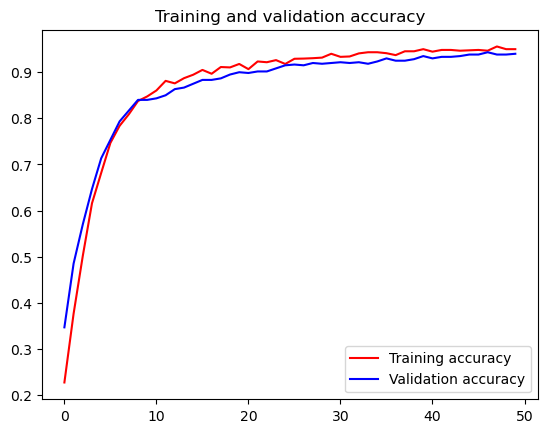

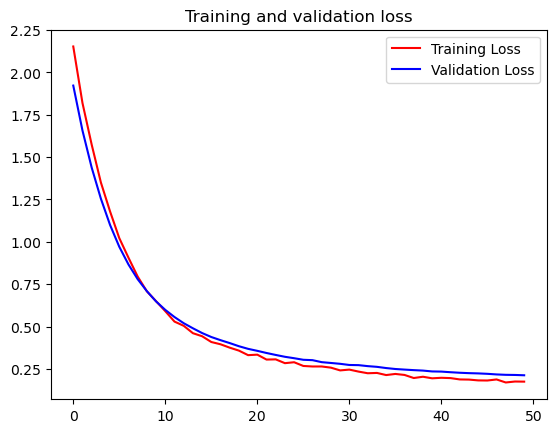

In [20]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save("FinalModel_V1.h5")

# Load and Predict Model

In [ ]:
import keras
model = keras.models.load_model("model_50epochs_MobileNetV2.h5")

In [ ]:
from PIL import Image
import os

print(os.getcwd())
im = Image.open(r"DatasetsV6/Bawang Merah/Bawang Merah_0.jpg")
im.show()

d:\Mikael\Kuliah\TUGAS KULIAH\Semester VI\Bangkit


In [ ]:
from PIL import Image
import numpy as np
from tensorflow import keras

# Load image
im = Image.open(r"DatasetsV6/Bawang Merah/Bawang Merah_0.jpg")

# Preprocess the image
im = im.resize((256, 256))
arr = np.array(im)
arr = (arr - arr.min()) / (arr.max() - arr.min())

# Load pre-trained model
# model = keras.models.load_model("path/to/model.h5")

# Make prediction
prediction = model.predict(np.expand_dims(arr, axis=0))

# Post-process the prediction
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 70ms/step


In [ ]:
import os
import tensorflow as tf
import numpy as np

class_names = os.listdir("DatasetsV6")
print(class_names)
target_dir = "udang"
img_dir = "test_images/{}/".format(target_dir)
# img_dir = "DatasetsV5/train/bawang_putih/"
# img_dir = "DatasetsV6/test/bawang_merah/"
    
correct = 0
for i,img in enumerate(os.listdir(img_dir)):   
    # Load image
    im = Image.open(r"test_images/{}/{}".format(target_dir,img))

    # Preprocess the image
    im = im.resize((256, 256))
    arr = np.array(im)
    arr = (arr - arr.min()) / (arr.max() - arr.min())

    # Load pre-trained model
    # model = keras.models.load_model("path/to/model.h5")

    # Make prediction
    prediction = model.predict(np.expand_dims(arr, axis=0))

    # Post-process the prediction
    predicted_class = class_names[np.argmax(prediction)]

    if(str.lower(predicted_class)==target_dir): correct += 1
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(predicted_class, 100 * np.max(tf.nn.softmax(prediction[0])))
    )

jumlah = len(os.listdir(img_dir))
print("Jumlah data: ", jumlah)
print("Jumlah data benar", correct)
print("Akurasi {:.2f}".format( correct/jumlah * 100))

['Ayam', 'Bawang Merah', 'Bawang Putih', 'Kambing', 'Lele', 'Sapi', 'Tahu', 'Telur', 'Tempe', 'Udang']
1/1 [==============================] - 0s 122ms/step
This image most likely belongs to Udang with a 16.31 percent confidence.
1/1 [==============================] - 0s 61ms/step
This image most likely belongs to Udang with a 20.29 percent confidence.
1/1 [==============================] - 0s 91ms/step
This image most likely belongs to Udang with a 15.78 percent confidence.
1/1 [==============================] - 0s 169ms/step
This image most likely belongs to Udang with a 22.48 percent confidence.
1/1 [==============================] - 0s 123ms/step
This image most likely belongs to Udang with a 22.56 percent confidence.
1/1 [==============================] - 0s 64ms/step
This image most likely belongs to Udang with a 22.98 percent confidence.
1/1 [==============================] - 0s 129ms/step
This image most likely belongs to Udang with a 22.27 percent confidence.
1/1 [=============